Lorenz attractor


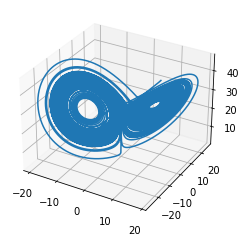

In [5]:
#Imports
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt       

# --------------------
# Function definitions
# --------------------
def ecuaciones(v, dv):
    """Define las ecuaciones diferenciales"""
    x=v[0]
    y=v[1]
    z=v[2]
    dv[0]=10.0*(y-x)
    dv[1]=28.0*x-y-x*z
    dv[2]=x*y-8.0*z/3.0
    return dv


def rk4(dv,v,n,t,dt):
    "Integra numericamente con Runge Kutta"
    v1=[]
    k1=[]
    k2=[]
    k3=[]
    k4=[]
    for x in range(0, n):
        v1.append(x)
        k1.append(x)
        k2.append(x)
        k3.append(x)
        k4.append(x)

    dt2=dt/2.0
    dt6=dt/6.0
    for x in range(0, n):
        v1[x]=v[x]
    dv(v1, k1)
    for x in range(0, n):
        v1[x]=v[x]+dt2*k1[x]
    dv(v1, k2)     
    for x in range(0, n):
        v1[x]=v[x]+dt2*k2[x]
    dv(v1, k3)
    for x in range(0, n):
        v1[x]=v[x]+dt*k3[x]
    dv(v1, k4)
    for x in range(0, n):
        v1[x]=v[x]+dt*k4[x]        
    for x in range(0, n):
        v[x]=v[x]+dt6*(2.0*(k2[x]+k3[x])+k1[x]+k4[x])
    return v

n=3 #Cantidad de variables   
v=[]
for x in range(0, n):
    v.append(x)
    
#Condionciones iniciales
v[0]=10.0
v[1]=10.0
v[2]=40.0
#Paso de tiempo
dt=0.001
t=0.0
t_pre=0.0
t_max=100.0
x=[]
y=[]
z=[]
print ("Lorenz attractor")

#print(v[0], v[1], v[2])
mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
cont=0
f=open("Lorenz_new.dat","w")
while t<t_max:
    rk4(ecuaciones,v,n,t,dt) #hace el update de las variables para cada paso de tiempo
    t+=dt
    x.append(cont)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO RK de "v"
    y.append(cont)
    z.append(cont)
    x[cont]=v[0]
    y[cont]=v[1]
    z[cont]=v[2]
    cont=cont+1
    f.write(str(v[0])+"\t"+str(v[1])+"\t"+str(v[2])+"\n")
#    f.write(str(t)+"\n")
f.close()


ax=fig.add_subplot(111, projection= '3d')

ax.plot(x,y, z, label="física")

plt.show()


In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 14 14:22:22 2019

@author: gabrielmindlin
"""

import numpy as np
from sklearn import linear_model

xyz=np.loadtxt('Lorenz_new.dat')
x=xyz[:,0]
y=xyz[:,1]
z=xyz[:,2]
xr=np.roll(x,1)
yr=np.roll(y,1)
zr=np.roll(z,1)

dxdt=1000*(xr-x)
dydt=1000*(yr-y)
dzdt=1000*(zr-z)


theta=np.zeros((xyz.shape[0],10))
theta[:,0]=np.ones_like(x)
theta[:,1]=x
theta[:,2]=y
theta[:,3]=z
theta[:,4]=x*x
theta[:,5]=x*y
theta[:,6]=x*z
theta[:,7]=y*y
theta[:,8]=y*z
theta[:,9]=z*z

print('ajuste de x \n')
clf=linear_model.Lasso(alpha=0.1,max_iter=100000,fit_intercept=False,normalize=False)
clf.fit(-theta,dxdt)
print(clf.coef_)
print(clf.intercept_)
print('\n')

print('ajuste de y \n')
clf=linear_model.Lasso(alpha=0.1,max_iter=100000,fit_intercept=False,normalize=False)
clf.fit(-theta,dydt)
print(clf.coef_)
print(clf.intercept_)
print('\n')

print('ajuste de z \n')
clf=linear_model.Lasso(alpha=0.1,max_iter=100000,fit_intercept=False,normalize=False)
clf.fit(-theta,dzdt)
print(clf.coef_)
print(clf.intercept_)




ajuste de x 

[ 0.00000000e+00 -9.74293233e+00  9.74279731e+00 -8.35335115e-02
 -2.96648235e-02  2.37299026e-02 -7.70113050e-03 -3.44629889e-03
  9.34708324e-03  4.11068674e-03]
0.0


ajuste de y 

[ 0.00000000e+00  2.72950259e+01 -7.05737217e-01 -2.51533023e-01
 -9.38020817e-02  7.80147720e-02 -9.83855549e-01 -1.31607917e-02
 -1.72599458e-03  1.27079750e-02]
0.0


ajuste de z 

[ 0.00000000e+00 -5.62182717e-02 -0.00000000e+00 -2.85754024e+00
 -5.88836207e-02  1.06224935e+00  1.15396571e-03 -1.80795825e-02
  1.09386683e-03  9.10753480e-03]
0.0


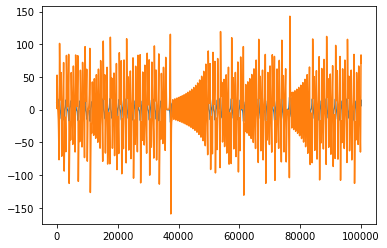

In [7]:
plt.plot(x)
plt.plot(dxdt[1:])

In [8]:

def rk4(dv,v,n,t,dt,e1):
    v1=[]
    k1=[]
    k2=[]
    k3=[]
    k4=[]
    for x in range(0, n):
        v1.append(x)
        k1.append(x)
        k2.append(x)
        k3.append(x)
        k4.append(x)

    dt2=dt/2.0
    dt6=dt/6.0
    for x in range(0, n):
        v1[x]=v[x]
    dv(v1, k1,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt2*k1[x]
    dv(v1, k2,e1)     
    for x in range(0, n):
        v1[x]=v[x]+dt2*k2[x]
    dv(v1, k3,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt*k3[x]
    dv(v1, k4,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt*k4[x]        
    for x in range(0, n):
        v[x]=v[x]+dt6*(2.0*(k2[x]+k3[x])+k1[x]+k4[x])
    return v

Sistema dinámico eps1 = 0.2


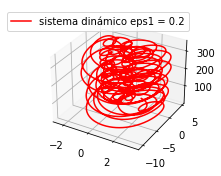

In [9]:
    
# --------------------
# Function definitions
# --------------------
import random

def dxdt(v,t,a,omega): 
    x,z, tita= v[0], v[1], v[2]
    eps1,A, eps2,omega=0.0, a,1,3.5
    eps1=eps1 #*(1+0.0*random.normalvariate(0,0.5))

    dxdt = z
    dzdt = x-z-x*x*x+x*z+eps1+A*np.cos(tita)+(eps2+0.*np.cos(tita))*x*x
    dtitadt = omega
    
    return [dxdt, dzdt, dtitadt]

def ecuaciones(v, dv,eps1):
    """Defino la ecuación diferencial que quiero ajustar"""
    x=v[0]
    y=v[1]
    z=v[2]
    eps1=eps1*(1+0.0*random.normalvariate(0,0.5))
    eps1, A, eps2,omega = 0.2,7.5,1,3.5
    dv[0]=y
    dv[1]=x-y-x*x*x+x*y+eps1+(eps2)*x*x+A*np.cos(z)
    dv[2]=omega
    return dv


n=3 #Cantidad de variables   
v=[]
for x in range(0, n):
    v.append(x)
    
v[0]=1.
v[1]=3.
v[2]=2.
dt=0.005
t=0.0
t_pre=0.0
t_max=100.0
x=[]
y=[]
z=[]
print ("Sistema dinámico eps1 = 0.2")
#print(v[0], v[1], v[2])
mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
cont=0
f=open("Nino_eps1_0.2_.dat","w")
while t<t_max:
    eps1 = 0.2
    rk4(ecuaciones,v,n,t,dt,eps1)
    t+=dt
    x.append(cont)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
    y.append(cont)
    z.append(cont)
    x[cont]=v[0]
    y[cont]=v[1]
    z[cont]=v[2]
    cont=cont+1
    f.write(str(v[0])+"\t"+str(v[1])+"\t"+str(v[2])+"\n")
#    f.write(str(t)+"\n")
f.close()

x1d=np.zeros(len(x))
x2d=np.zeros(len(x))
x0d=np.zeros(len(x))
for i in range(60,len(x)):
    x1d[i]=-x[i-30]
    x2d[i]=-x[i-60]
    x0d[i]=-x[i]

omega = 3.5
T = 2*np.pi / omega
num_muestras_periodo = T/dt

ax=fig.add_subplot(121, projection= '3d')

ax.plot(x,y, np.array(z) % int(num_muestras_periodo) , 'r',label="sistema dinámico eps1 = 0.2")

plt.legend()
plt.show()

Datos sintéticos x
Datos sintéticos y


(0.0, 100.0)

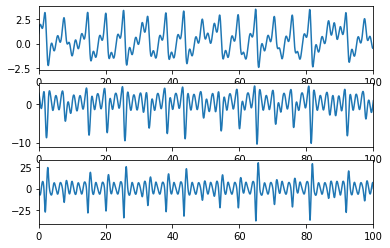

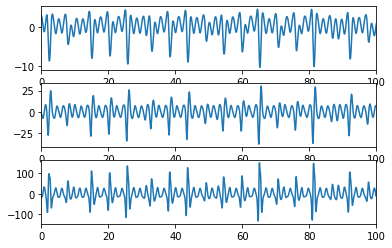

In [10]:
x = np.array(x) #normalize(x0).values
y = np.array(y)
z = np.array(z)
time = np.arange(0,t_max+dt,dt)

dx = np.zeros(x.shape,np.float)
ddx = np.zeros(x.shape,np.float)
dx[0:-1] = np.diff(x)/np.diff(time)
dx[-1] = (x[-1] - x[-2])/(time[-1] - time[-2])

ddx[0:-1] = np.diff(dx)/np.diff(time)
ddx[-1] = (dx[-1] - dx[-2])/(time[-1] - time[-2])

dy = np.zeros(y.shape,np.float)
ddy = np.zeros(y.shape,np.float)
dy[0:-1] = np.diff(y)/np.diff(time)
dy[-1] = (y[-1] - y[-2])/(time[-1] - time[-2])

ddy[0:-1] = np.diff(dy)/np.diff(time)
ddy[-1] = (dy[-1] - dy[-2])/(time[-1] - time[-2])

dz = np.zeros(z.shape,np.float)
ddz = np.zeros(z.shape,np.float)
dz[0:-1] = np.diff(z)/np.diff(time)
dz[-1] = (z[-1] - z[-2])/(time[-1] - time[-2])

print('Datos sintéticos x')
fig = plt.figure()
ax0 = fig.add_subplot(3,1,1)
ax1 = fig.add_subplot(3,1,2)
ax2 = fig.add_subplot(3,1,3)
ax0.plot(time,x, label='sistema extendido')
ax0.set_xlim(0,100)
ax1.plot(time,dx, label='derivada sistema extendido')
ax1.set_xlim(0,100)
ax2.plot(time,ddx, label='derivada sistema extendido')
ax2.set_xlim(0,100)

print('Datos sintéticos y')
fig = plt.figure()
ax0 = fig.add_subplot(3,1,1)
ax1 = fig.add_subplot(3,1,2)
ax2 = fig.add_subplot(3,1,3)
ax0.plot(time,y, label='sistema extendido')
ax0.set_xlim(0,100)
ax1.plot(time,dy, label='derivada sistema extendido')
ax1.set_xlim(0,100)
ax2.plot(time,ddy, label='derivada sistema extendido')
ax2.set_xlim(0,100)


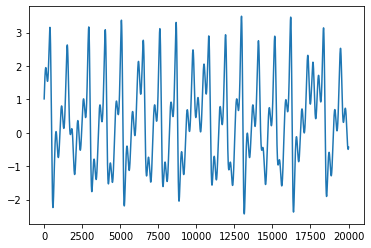

In [11]:
plt.plot(x[:40000])

In [12]:
import numpy as np
from sklearn import linear_model

theta=np.zeros((len(x),9))
theta[:,0]=np.ones_like(x)
theta[:,1]=x
theta[:,2]=y
theta[:,3]=x*x
theta[:,4]=x*y
theta[:,5]=x*x*x
theta[:,6]=np.cos(z) 
theta[:,7]=np.sin(z) 
theta[:,8]=z

print('ajuste de x \n')
clf=linear_model.Lasso(alpha=0.1,max_iter=100000,fit_intercept=False,normalize=False)
clf.fit(theta,y)
print(clf.coef_)
print(clf.intercept_)
print('\n')

print('ajuste de y \n')
clf=linear_model.Lasso(alpha=0.001,max_iter=100000,fit_intercept=False,normalize=False)
clf.fit(theta,dy)
print(clf.coef_)
y_coef = clf.coef_
print(clf.intercept_)
print('\n')

print('ajuste de z \n')
clf=linear_model.Lasso(alpha=0.1,max_iter=100000,fit_intercept=False,normalize=False)
clf.fit(theta,dz)
z_coef = clf.coef_
print(clf.coef_)
print(clf.intercept_)
print('\n')

ajuste de x 

[-0.         -0.          0.98646498 -0.          0.         -0.
  0.          0.         -0.        ]
0.0


ajuste de y 

[ 2.23527463e-01  1.01796560e+00 -1.01844642e+00  9.84760079e-01
  9.95153242e-01 -1.00098579e+00  7.48711665e+00 -2.34234146e-02
 -6.08839250e-06]
0.0


ajuste de z 

[ 3.06692497e+00  0.00000000e+00 -0.00000000e+00  1.55722456e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.72637868e-03]
0.0




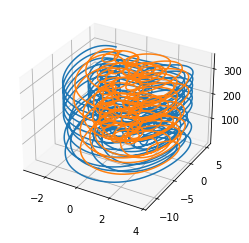

In [13]:
parametros = y_coef
p0,p1,p2,p3,p4,p5,p6,p7,p8 = tuple(parametros)
p8 = z_coef[0]
def dxdt(v,t): 
    x,y, tita= v[0], v[1], v[2]
    eps1, eps2, A = p0, p3, p6
    eps1=eps1#*(1+0.0*random.normalvariate(0,0.5))
    omega = p8 

    dxdt =  y
    dydt =  eps1 + p1 *x + p2*y +eps2*x*x +p4*x*y + p5*x*x*x + A*np.cos(tita) 
    dtitadt = omega
    
    return [dxdt, dydt, dtitadt]

from scipy.integrate import odeint
import numpy as np
t_total=100.0
dt=.005
omega = 3.5
t = np.arange(0,t_total,dt)
v0 = [x[0],dx[0],1]#v0 = [x[0],dx[0],1]
sol = odeint(dxdt,v0,t)
x_fit, z_fit, tita_fit = sol[:,0], sol[:,1], sol[:,2]

T = 2*np.pi / omega
num_muestras_periodo = T/dt

mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
ax=fig.add_subplot(111, projection= '3d')
ax.plot(x_fit,z_fit,tita_fit % int(num_muestras_periodo),label="ajuste datos sinteticos - sindy integrado")
ax.plot(x,y,z % int(num_muestras_periodo),label="ajuste datos sinteticos")
#ax.plot(x1d,x2d,x0d,label="ajuste datos sinteticos")
#

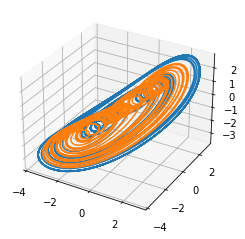

In [14]:
x1d=np.zeros(len(x))
x2d=np.zeros(len(x))
x0d=np.zeros(len(x))
for i in range(60,len(x)):
    x1d[i]=-x[i-30]
    x2d[i]=-x[i-60]
    x0d[i]=-x[i]

x1d_fit=np.zeros(len(x_fit))
x2d_fit=np.zeros(len(x_fit))
x0d_fit=np.zeros(len(x_fit))
for i in range(60,len(x_fit)):
    x1d_fit[i]=-x_fit[i-30]
    x2d_fit[i]=-x_fit[i-60]
    x0d_fit[i]=-x_fit[i]

mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
ax=fig.add_subplot(111, projection= '3d')
ax.plot(x0d_fit,x1d_fit,x2d_fit ,label="ajuste datos sinteticos - sindy integrado")
ax.plot(x0d,x1d,x2d ,label="ajuste datos sinteticos")
#ax.plot(x1d,x2d,x0d,label="ajuste datos sinteticos")
#

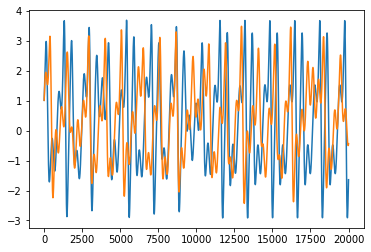

In [15]:
plt.plot(x_fit)
plt.plot(x)

## Ruido

Idea: Con parámetros A = 10, \omega = 4.5 el sistema sigue una órbita periódica de período 4. Si agregamos ruido en la amplitud del forzante, obtenemos el comportamiento caótico muy similar al del sistema extendido con órbitas de distintos períodos.

Ahí va el gráfico


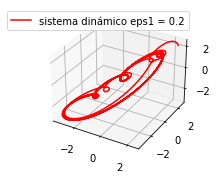

In [49]:
def ecuaciones(v, dv,eps1):
    """Defino la ecuación diferencial que quiero ajustar"""
    x=v[0]
    y=v[1]
    z=v[2]
    eps1, A, eps2,omega = 0.2,10,1,4.7
    #A=A*(1+0.0*random.normalvariate(0,0.5))
    dv[0]=y
    dv[1]=x-y-x*x*x+x*y+eps1+(eps2)*x*x+A*np.cos(z)
    dv[2]=omega
    return dv


n=3 #Cantidad de variables   
v=[]
for x in range(0, n):
    v.append(x)
    
v[0]=1.
v[1]=2.
v[2]=3.
dt=0.0036
t=0.0
t_pre=0.0
t_max=1000.0
x=[]
y=[]
z=[]
print ("Ahí va el gráfico")
#print(v[0], v[1], v[2])
mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
cont=0
f=open("Nino_eps1_0.25+ruido_.dat","w")
eps1 = 0.2
while t<t_max:
    rk4(ecuaciones,v,n,t,dt,eps1)
    t+=dt
    x.append(cont)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
    y.append(cont)
    z.append(cont)
    x[cont]=v[0]
    y[cont]=v[1]
    z[cont]=v[2]
    cont=cont+1
    f.write(str(v[0])+"\t"+str(v[1])+"\t"+str(v[2])+"\n")
#    f.write(str(t)+"\n")
f.close()


x1d=np.zeros(len(x))
x2d=np.zeros(len(x))
x0d=np.zeros(len(x))
for i in range(60,len(x)):
    x1d[i]=-x[i-30]
    x2d[i]=-x[i-60]
    x0d[i]=-x[i]

ax=fig.add_subplot(121, projection= '3d')
L = 10000
ax.plot(x0d[600:L],x1d[600:L], x2d[600:L], 'r',label="sistema dinámico eps1 = 0.2")

plt.legend()
plt.show()

Ahí va el gráfico


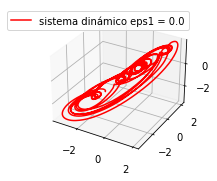

In [68]:

def ecuaciones(v, dv,eps1):
    """Defino la ecuación diferencial que quiero ajustar"""
    x=v[0]
    y=v[1]
    z=v[2]
    eps1, A, eps2,omega = 0.2,10,1,4.7
    A=A*(1+5.0*random.normalvariate(0,0.5))
    dv[0]=y
    dv[1]=x-y-x*x*x+x*y+eps1+(eps2)*x*x+A*np.cos(z)
    dv[2]=omega
    return dv


n=3 #Cantidad de variables   
v=[]
for x in range(0, n):
    v.append(x)
    
v[0]=1.
v[1]=3.
v[2]=2.
dt=0.0036
t=0.0
t_pre=0.0
t_max=1000.0
x=[]
y=[]
z=[]
print ("Ahí va el gráfico")
#print(v[0], v[1], v[2])
mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
cont=0
f=open("Nino_eps1_0.25+ruido_.dat","w")
while t<t_max:
    eps1 = 0.25
    rk4(ecuaciones,v,n,t,dt,eps1)
    t+=dt
    x.append(cont)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
    y.append(cont)
    z.append(cont)
    x[cont]=v[0]
    y[cont]=v[1]
    z[cont]=v[2]
    cont=cont+1
    f.write(str(v[0])+"\t"+str(v[1])+"\t"+str(v[2])+"\n")
#    f.write(str(t)+"\n")
f.close()

t = np.arange(0,1000+dt,dt)
x1d=np.zeros(len(x))
x2d=np.zeros(len(x))
x0d=np.zeros(len(x))
for i in range(60,len(x)):
    x1d[i]=-x[i-30]
    x2d[i]=-x[i-60]
    x0d[i]=-x[i]

ax=fig.add_subplot(121, projection= '3d')

ax.plot(x0d[200:12000],x1d[200:12000], x2d[200:12000], 'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

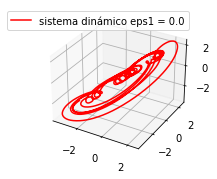

In [70]:
fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')

ax.plot(x0d[7400:16000],x1d[7400:16000], x2d[7400:16000], 'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

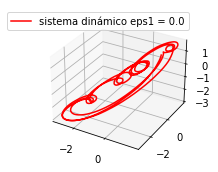

In [71]:
fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')

ax.plot(x0d[5400:10000],x1d[5400:10000], x2d[5400:10000], 'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

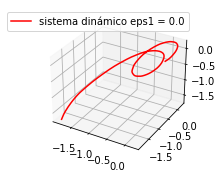

In [72]:
fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')

ax.plot(x0d[15400:16100],x1d[15400:16100], x2d[15400:16100], 'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

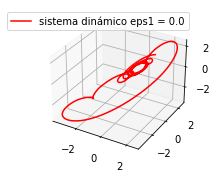

In [73]:
fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')

ax.plot(x0d[15100:18550],x1d[15100:18550], x2d[15100:18550], 'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

In [46]:
#DT
2* np.pi /365 / 4.7

0.0036625970895829705

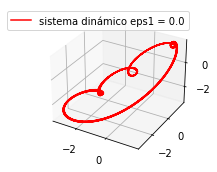

In [195]:
x1d=np.zeros(len(x))
x2d=np.zeros(len(x))
x0d=np.zeros(len(x))
for i in range(30,len(x)):
    x1d[i]=-x[i-15]
    x2d[i]=-x[i-30]
    x0d[i]=-x[i]

fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')

ax.plot(x0d[1500:5000],x1d[1500:5000], x2d[1500:5000], 'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

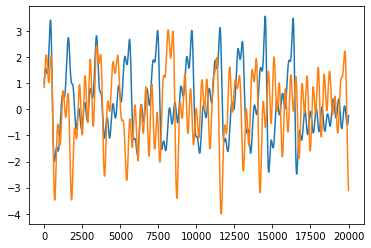

In [80]:
plt.plot(x[:20000])
plt.plot(x0[:20000] - np.mean(x0))

In [131]:

def ecuaciones(v, dv,eps1):
    """Defino la ecuación diferencial que quiero ajustar"""
    x=v[0]
    y=v[1]
    z=v[2]
    eps1, A, eps2,omega = 0.2,10,1,4.7
    A=A*(1+20.0*random.normalvariate(0,0.5))
    dv[0]=y
    dv[1]=x-y-x*x*x+x*y+eps1+(eps2)*x*x+A*np.cos(z)
    dv[2]=omega
    return dv


for m in range(1):
    n=3 #Cantidad de variables   
    v=[]
    for x in range(0, n):
        v.append(x)

    v[0]=1.*(1+0.5*random.normalvariate(0,0.5))
    v[1]=3.*(1+0.5*random.normalvariate(0,0.5))
    v[2]=2.*(1+0.5*random.normalvariate(0,0.5))
    dt=0.0036
    t=0.0
    t_pre=0.0
    t_max=1000.0
    x=[]
    y=[]
    z=[]
    print ("Ahí va el gráfico")
    #print(v[0], v[1], v[2])
    mpl.rcParams['legend.fontsize'] = 10
    fig=plt.figure()
    cont=0
    f=open("Nino_eps1_0.25+ruido_.dat","w")
    while t<t_max:
        eps1 = 0.25
        rk4(ecuaciones,v,n,t,dt,eps1)
        t+=dt
        x.append(cont)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
        y.append(cont)
        z.append(cont)
        x[cont]=v[0]
        y[cont]=v[1]
        z[cont]=v[2]
        cont=cont+1
        f.write(str(v[0])+"\t"+str(v[1])+"\t"+str(v[2])+"\n")
    #    f.write(str(t)+"\n")
    f.close()
    x = x[:60000]
    np.savetxt('nino_periodo4_ruido_'+str(m)+'.txt', x)




Ahí va el gráfico


<Figure size 432x288 with 0 Axes>

In [110]:

def ecuaciones(v, dv,eps1):
    """Defino la ecuación diferencial que quiero ajustar"""
    x=v[0]
    y=v[1]
    z=v[2]
    eps1, A, eps2,omega = 0.2,7.5,1,4.7
    #A=A*(1+5.0*random.normalvariate(0,0.5))
    dv[0]=y
    dv[1]=x-y-x*x*x+x*y+eps1+(eps2)*x*x+A*np.cos(z)
    dv[2]=omega
    return dv

for m in range(1):
    n=3 #Cantidad de variables   
    v=[]
    for x in range(0, n):
        v.append(x)

    v[0]=1.*(1+0.5*random.normalvariate(0,0.5))
    v[1]=3.*(1+0.5*random.normalvariate(0,0.5))
    v[2]=2.*(1+0.5*random.normalvariate(0,0.5))
    dt=0.0036  #para tener aprox 365 muestras por periodo como en las del nino
    t=0.0
    t_pre=0.0
    t_max=1000.0
    x=[]
    y=[]
    z=[]
    print ("Ahí va el gráfico")
    #print(v[0], v[1], v[2])
    mpl.rcParams['legend.fontsize'] = 10
    fig=plt.figure()
    cont=0
    f=open("Nino_eps1_0.25+ruido_.dat","w")
    while t<t_max:
        eps1 = 0.25
        rk4(ecuaciones,v,n,t,dt,eps1)
        t+=dt
        x.append(cont)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
        y.append(cont)
        z.append(cont)
        x[cont]=v[0]
        y[cont]=v[1]
        z[cont]=v[2]
        cont=cont+1
        f.write(str(v[0])+"\t"+str(v[1])+"\t"+str(v[2])+"\n")
    #    f.write(str(t)+"\n")
    f.close()
    x = x[:60000]
    np.savetxt('nino_cerca_de_periodo4_sin_ruido_'+str(m)+'.txt', x)



Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico


<ipython-input-110-4fd6f59b656c>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure()


Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico
Ahí va el gráfico


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [121]:
def ecuaciones(v, dv,eps1):
    """Defino la ecuación diferencial que quiero ajustar"""
    x=v[0]
    y=v[1]
    z=v[2]
    eps1, A, eps2,omega = 0.2,10,1,4.7
    #A=A*(1+5.0*random.normalvariate(0,0.5))
    dv[0]=y
    dv[1]=x-y-x*x*x+x*y+eps1+(eps2)*x*x+A*np.cos(z)
    dv[2]=omega
    return dv

for m in range(5):
    n=3 #Cantidad de variables   
    v=[]
    for x in range(0, n):
        v.append(x)

    v[0]=1.*(1+0.5*random.normalvariate(0,0.5))
    v[1]=3.*(1+0.5*random.normalvariate(0,0.5))
    v[2]=2.*(1+0.5*random.normalvariate(0,0.5))
    dt=0.0036
    t=0.0
    t_pre=0.0
    t_max=1000.0
    x=[]
    y=[]
    z=[]
    cont=0
    while t<t_max:
        eps1 = 0.25
        rk4(ecuaciones,v,n,t,dt,eps1)
        t+=dt
        x.append(cont)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
        y.append(cont)
        z.append(cont)
        x[cont]=v[0]
        y[cont]=v[1]
        z[cont]=v[2]
        cont=cont+1

    x = x[:60000]
    np.savetxt('nino_periodo4_sin_ruido_'+str(m)+'.txt', x)



60000

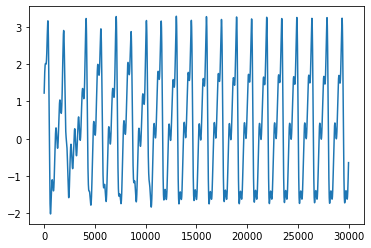

In [122]:
for i in range(1):
    x_ruido = np.loadtxt('nino_periodo4_sin_ruido_'+str(i)+'.txt')
    plt.plot(x_ruido[:30000])
    
len(x_ruido)

60000

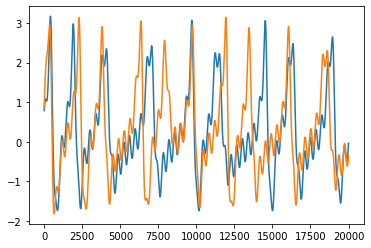

In [114]:
for i in range(2):
    x_ruido = np.loadtxt('nino_cerca_de_periodo4_sin_ruido_'+str(i)+'.txt')
    plt.plot(x_ruido[:20000])
    
len(x_ruido)

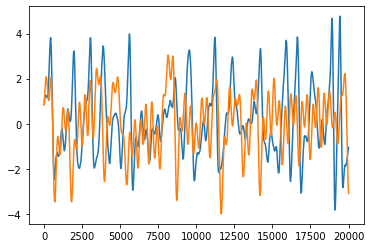

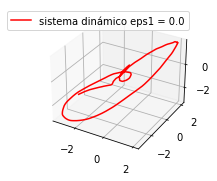

In [139]:
for i in range(1):
    x_ruido = np.loadtxt('nino_periodo4_ruido_'+str(i)+'.txt')
    plt.plot(x_ruido[:20000])
    
len(x_ruido)
plt.plot(x0[:20000]-np.mean(x0))

x1d=np.zeros(len(x))
x2d=np.zeros(len(x))
x0d=np.zeros(len(x))
for i in range(60,len(x)):
    x1d[i]=-x[i-30]
    x2d[i]=-x[i-60]
    x0d[i]=-x[i]

fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')
L =1500 +  4*365
ax.plot(x0d[1500:L],x1d[1500:L], x2d[1500:L], 'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

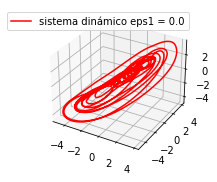

In [145]:
fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')
L1 = 29*365
L =L1 +  34*365
ax.plot(x0d[L1:L],x1d[L1:L], x2d[L1:L], 'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

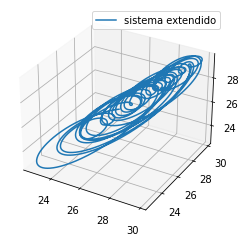

In [31]:
import pandas as pd
nino_embedding = pd.read_csv('/home/julia/repositorios/ENSO_ajuste/embedding_CESM2_1.csv')
x0=nino_embedding['dim1'][:]
x1=nino_embedding['dim2'][:]
x2=nino_embedding['dim3'][:]

fig=plt.figure()

ax=fig.add_subplot(111, projection= '3d')

ax.plot(x0[50000:60000],x1[50000:60000], x2[50000:60000], label="sistema extendido")
plt.legend()

plt.show()

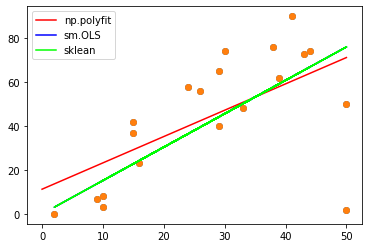

In [203]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#ejemplo robado de alguna pagina
students = {'hours': [29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50],
            'test_results': [65, 7, 8, 76, 23, 56, 2, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 50]}

student_data = pd.DataFrame(data=students)
x = student_data.hours
y = student_data.test_results
plt.scatter(x,y)

#np.polyfit (same xr.polyfit)
model = np.polyfit(x, y, 1)
predict = np.poly1d(model)
hours_studied = 20
predict(hours_studied)
x_lin_reg = range(0, 51)
y_lin_reg = predict(x_lin_reg)

#sm.OLS
x2 = sm.add_constant(x)
x2 = x
model = sm.OLS(y, x2).fit()
ypred = model.predict(x2)

#sklearn
reg = LinearRegression(fit_intercept=False).fit(np.array(x).reshape((-1,1)), y)
ypred_sk = reg.predict(np.array(x).reshape((-1,1)))

#plot
plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, color = 'red', label='np.polyfit')
plt.plot(x,ypred, color='blue', label='sm.OLS')
plt.plot(x,ypred_sk, color='lime', label='sklean')
plt.legend()

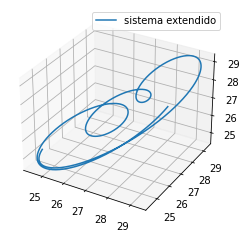

In [393]:

fig=plt.figure()

ax=fig.add_subplot(111, projection= '3d')

ax.plot(x0[50500:51800],x1[50500:51800], x2[50500:51800], label="sistema extendido")
plt.legend()

plt.show()

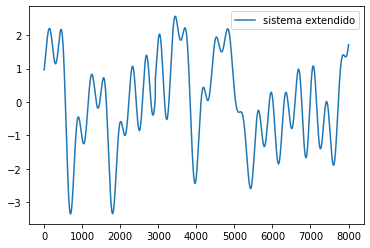

In [394]:
def normalize(x):
    return x-np.mean(x)

time = np.arange(1,len(x0[:8000])+1,1)
plt.plot(time,normalize(x0[:8000]),label='sistema extendido')
#plt.plot(time,np.cos(2*np.pi/365*time),label='forzante periodico')
#plt.plot(x_fit[:8000])
plt.legend()

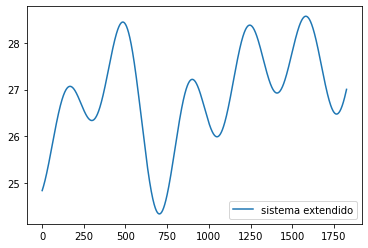

In [395]:
time = np.arange(1,len(x0[63*365:68*365])+1,1)
plt.plot(time,x0[63*365:68*365],label='sistema extendido')
#plt.plot(time,np.cos(2*np.pi/365*time),label='forzante periodico')
#plt.plot(x_fit[np.arange(63,66)*365 + np.array([50,0,100])])
plt.legend()

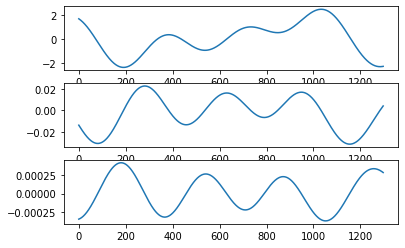

In [396]:
fig = plt.figure()
ax0 = fig.add_subplot(3,1,1)
ax1 = fig.add_subplot(3,1,2)
ax2 = fig.add_subplot(3,1,3)


x_short = x0[50500:51800]
x = x_short.values-np.mean(x_short) #normalize(x0).values
time = np.arange(0,len(x),1)

dx = np.zeros(x.shape,np.float)
ddx = np.zeros(x.shape,np.float)
dx[0:-1] = np.diff(x)/np.diff(time)
dx[-1] = (x[-1] - x[-2])/(time[-1] - time[-2])

y = dx

ddx[0:-1] = np.diff(dx)/np.diff(time)
ddx[-1] = (dx[-1] - dx[-2])/(time[-1] - time[-2])

dy = ddx

z = np.arange(0,len(x),1)*(2*np.pi/365)
dz = np.zeros(z.shape,np.float)
dz[0:-1] = np.diff(z)/np.diff(time)
dz[-1] = (z[-1] - z[-2])/(time[-1] - time[-2])


ax0.plot(time[:-2],x[:-2], label='sistema extendido')
#ax0.set_xlim(0,365*4)
ax1.plot(time[:-2],dx[:-2], label='derivada sistema extendido')
#ax1.set_xlim(0,365*4)
ax2.plot(time[:-2],ddx[:-2], label='derivada sistema extendido')
#ax1.set_xlim(0,365*4)

ax.legend()
plt.show()

## Ajuste 1

In [397]:
import numpy as np
from sklearn import linear_model

#x = x[1000:-1000];y = y[1000:-1000];z = z[1000:-1000]
#dx = dx[1000:-1000];dy = dy[1000:-1000];dz = dz[1000:-1000]
theta=np.zeros((len(x),9))
theta[:,0]=np.ones_like(x)
theta[:,1]=x
theta[:,2]=y
theta[:,3]=z
theta[:,4]=x*x
theta[:,5]=x*y
theta[:,6]=x*x*x
theta[:,7]=np.cos(z) 
theta[:,8]=np.cos(z) 


print('ajuste de x \n')
clf=linear_model.Lasso(alpha=0.00001,max_iter=1000000,fit_intercept=False,normalize=False)
clf.fit(theta,dx)
print(clf.coef_)
print(clf.intercept_)
print('\n')

print('ajuste de y \n')
clf=linear_model.Lasso(alpha=0.000001,max_iter=100000000,fit_intercept=False,normalize=False)
clf.fit(theta,dy)
y_parametros = clf.coef_
print(clf.coef_)
print(clf.intercept_)
print('\n')

print('ajuste de z \n')
clf=linear_model.Lasso(alpha=0.00001,max_iter=10000000,fit_intercept=False,normalize=False)
clf.fit(theta,dz)
z_parametros = clf.coef_
print(clf.coef_)
print(clf.intercept_)
print('\n')

ajuste de x 

[ 5.60078421e-06  1.83737252e-04  9.53895831e-01 -1.46609059e-05
 -0.00000000e+00 -0.00000000e+00 -6.80033082e-06 -3.91011281e-04
 -3.41569710e-20]
0.0


ajuste de y 

[-8.36466203e-06 -4.16310507e-05 -0.00000000e+00  3.24300609e-06
 -1.06872710e-05 -0.00000000e+00 -9.93286295e-06 -2.02608398e-04
 -0.00000000e+00]
0.0


ajuste de z 

[ 1.71799545e-02 -0.00000000e+00 -0.00000000e+00  2.25294844e-06
  0.00000000e+00 -0.00000000e+00 -4.24151793e-07  0.00000000e+00
  0.00000000e+00]
0.0




In [398]:
2*np.pi/365

0.01721420632103996

In [399]:
p0,p1,p2,p3,p4,p5,p6,p7,p8= tuple(y_parametros)
omega = z_parametros[0]
def dxdt(v,t): 
    x,y, tita= v[0], v[1], v[2]
    A2_ratio = p8/p7
    eps1, eps2, A1,A2 = p0, p4, p7,p8
    #A1=A1*(1+0.1*random.normalvariate(0,0.5))
    #A2 = A1*A2_ratio
    #dt = 0.1
    w = omega

    dxdt =  y
    dydt =  eps1 + p1 *x + p2*y +eps2*x*x +p5*x*y + p6*x*x*x + A1*np.cos(tita) + A2*np.sin(tita)
    dtitadt = w
    
    return [dxdt, dydt, dtitadt]


In [400]:
from scipy.integrate import odeint
import numpy as np
t_total=20000.0
dt=1
t = np.arange(1,t_total,dt)
v0 = [x[0],dx[0],2]#v0 = [x[0],dx[0],1]
sol = odeint(dxdt,v0,t)
x_fit, z_fit, tita_fit = sol[:,0], sol[:,1], sol[:,2]


/home/julia/.local/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


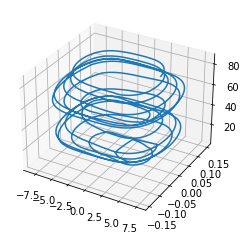

In [401]:
mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
ax=fig.add_subplot(111, projection= '3d')
ax.plot(x_fit[:5000],z_fit[:5000],tita_fit[:5000] % int(num_muestras_periodo),label="ajuste datos reales - sindy integrado")
#ax.plot(x1d,x2d,x0d,label="ajuste datos sinteticos")
#

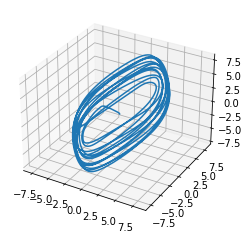

In [402]:
x1d_fit=np.zeros(len(x_fit))
x2d_fit=np.zeros(len(x_fit))
x0d_fit=np.zeros(len(x_fit))
for i in range(90,len(x_fit)):
    x1d_fit[i]=-x_fit[i-90]
    x2d_fit[i]=-x_fit[i-45]
    x0d_fit[i]=-x_fit[i]

mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
ax=fig.add_subplot(111, projection= '3d')
ax.plot(x0d_fit[200:5000],x1d_fit[200:5000],x2d_fit[200:5000] ,label="ajuste datos sinteticos - sindy integrado")
#ax.plot(x0d,x1d,x2d ,label="ajuste datos sinteticos")
#ax.plot(x1d,x2d,x0d,label="ajuste datos sinteticos")
#

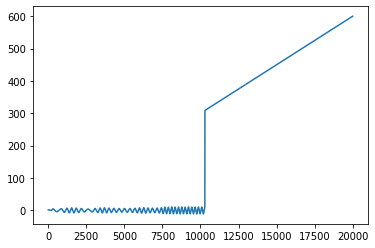

In [403]:
plt.plot(x_fit[:20000])

## Ajuste 2

In [76]:
import numpy as np
from sklearn import linear_model

y = dx*1000
dy = ddx*10000

time = np.arange(0,len(x),1)
theta=np.zeros((len(x),7))
theta[:,0]=np.ones_like(x)
theta[:,1]=x
theta[:,2]=y
theta[:,3]=x*x
theta[:,4]=x*y
theta[:,5]=x*x*x
theta[:,6]=np.cos(2*np.pi/365*time) 

print('ajuste de x \n')
clf=linear_model.Lasso(alpha=0.01,max_iter=100000,fit_intercept=False,normalize=False)
clf.fit(theta,y)
print(clf.coef_)
print(clf.intercept_)
print('\n')

print('ajuste de y \n')
clf=linear_model.Lasso(alpha=0.01,max_iter=100000,fit_intercept=False,normalize=False)
clf.fit(theta,dy)
print(clf.coef_)
print(clf.intercept_)
print('\n')


ajuste de x 

[ 0.          0.          0.99994482  0.         -0.          0.
 -0.        ]
0.0


ajuste de y 



ValueError: Found input variables with inconsistent numbers of samples: [4935, 6935]

In [305]:
parametros = clf.coef_
p0,p1,p2,p3,p4,p5,p6 = tuple(parametros)
def dxdt(v,t): 
    x,y, tita= v[0], v[1], v[2]
    eps1, eps2, A = p0, p3, p6
    eps1=eps1#*(1+0.0*random.normalvariate(0,0.5))
    dt = 0.1
    omega = 2*np.pi/365.

    dxdt =  y
    dydt =  eps1 + p1 *x + p2*y +eps2*x*x +p4*x*y + p5*x*x*x + A*np.cos(tita) 
    dtitadt = omega
    
    return [dxdt, dydt, dtitadt]


In [306]:
from scipy.integrate import odeint
import numpy as np
t_total=1000.0
dt=.01
t = np.arange(0,t_total,dt)
v0 = [x[0],dx[0]*10,1]
sol = odeint(dxdt,v0,t)
x_fit, z_fit, tita_fit = sol[:,0], sol[:,1], sol[:,2]


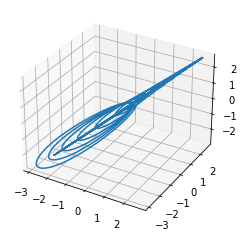

In [310]:
N = 3
#x_fit = x_fit[200:]
x1d=np.zeros(len(x_fit))
x2d=np.zeros(len(x_fit))
x0d=np.zeros(len(x_fit))
for i in range(60,len(x_fit)):
    x1d[i]=-x_fit[i-60]
    x2d[i]=-x_fit[i-30]
    x0d[i]=-x_fit[i]

mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
ax=fig.add_subplot(111, projection= '3d')
ax.plot(x1d,x2d,x0d,label="sistema ajustado sindy")
#

ajuste de x 

[ 0.         -0.          0.99940064  0.         -0.         -0.
  0.        ]
0.0


ajuste de y 

[ 0.00492773 -0.05441797 -0.00652506 -0.00482582  0.00098885 -0.00380377
  0.1875579 ]
0.0




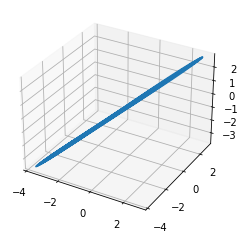

In [311]:
import numpy as np
from sklearn import linear_model

y = dx*1000
dy = ddx*1000

time = np.arange(0,len(x),1)
theta=np.zeros((len(x),7))
theta[:,0]=np.ones_like(x)
theta[:,1]=x
theta[:,2]=y
theta[:,3]=x*x
theta[:,4]=x*y
theta[:,5]=x*x*x
theta[:,6]=np.cos(2*np.pi/365*time) 

print('ajuste de x \n')
clf=linear_model.Lasso(alpha=0.1,max_iter=100000,fit_intercept=False,normalize=False)
clf.fit(theta,y)
print(clf.coef_)
print(clf.intercept_)
print('\n')

print('ajuste de y \n')
clf=linear_model.Lasso(alpha=0.001,max_iter=100000,fit_intercept=False,normalize=False)
clf.fit(theta,dy)
print(clf.coef_)
print(clf.intercept_)
print('\n')

parametros = clf.coef_
p0,p1,p2,p3,p4,p5,p6 = tuple(parametros)
def dxdt(v,t): 
    x,y, tita= v[0], v[1], v[2]
    eps1, eps2, A = p0, p3, p6
    eps1=eps1#*(1+0.0*random.normalvariate(0,0.5))
    dt = 0.1
    omega = 2*np.pi/365.

    dxdt =  y
    dydt =  eps1 + p1 *x + p2*y +eps2*x*x +p4*x*y + p5*x*x*x + A*np.cos(tita) 
    dtitadt = omega
    
    return [dxdt, dydt, dtitadt]

from scipy.integrate import odeint
import numpy as np
t_total=1000.0
dt=.01
t = np.arange(0,t_total,dt)
v0 = [x[0],dx[0]*10,1]
sol = odeint(dxdt,v0,t)
x_fit, z_fit, tita_fit = sol[:,0], sol[:,1], sol[:,2]

N = 3
#x_fit = x_fit[200:]
x1d=np.zeros(len(x_fit))
x2d=np.zeros(len(x_fit))
x0d=np.zeros(len(x_fit))
for i in range(30,len(x_fit)):
    x1d[i]=x_fit[i-30]
    x2d[i]=x_fit[i-15]
    x0d[i]=x_fit[i]

mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
ax=fig.add_subplot(111, projection= '3d')
ax.plot(x1d,x2d,x0d,label="sistema ajustado sindy")
#

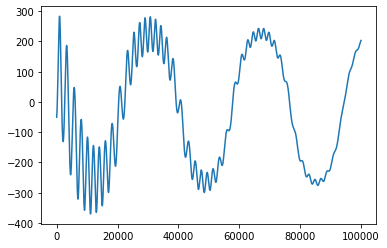

In [312]:
plt.plot(x_fit*100)

## Ajuste 3

In [606]:
import numpy as np
from sklearn import linear_model

y = dx*10000
dy = ddx*100000

time = np.arange(0,len(x),1)
theta=np.zeros((len(x),7))
theta[:,0]=np.ones_like(x)
theta[:,1]=x
theta[:,2]=y
theta[:,3]=x*x
theta[:,4]=x*y
theta[:,5]=x*x*x
theta[:,6]=np.cos(2*np.pi/365*time) 

print('ajuste de x \n')
clf=linear_model.Lasso(alpha=0.01,max_iter=100000,fit_intercept=False,normalize=False)
clf.fit(theta,y)
print(clf.coef_)
print(clf.intercept_)
print('\n')

print('ajuste de y \n')
clf=linear_model.Lasso(alpha=0.01,max_iter=100000,fit_intercept=False,normalize=False)
clf.fit(theta,dy)
print(clf.coef_)
print(clf.intercept_)
print('\n')


ajuste de x 

[-0.00000000e+00  1.84241859e-02  9.99919264e-01 -8.14501148e-04
  2.92639245e-06  5.16404886e-06 -0.00000000e+00]
0.0


ajuste de y 

[ 0.00000000e+00  7.15456550e+00  3.95446936e-02 -3.70719719e-01
 -3.58253564e-04  3.94263474e-03  2.21858830e+01]
0.0




/home/julia/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465886.0989736594, tolerance: 774.4629899751465
  model = cd_fast.enet_coordinate_descent(


In [618]:
parametros = clf.coef_
p0,p1,p2,p3,p4,p5,p6 = tuple(parametros)
def dxdt(v,t): 
    x,y, tita= v[0], v[1], v[2]
    eps1, eps2, A = p0, p3, p6
    eps1=eps1#*(1+0.0*random.normalvariate(0,0.5))
    dt = 0.1
    omega = 2*np.pi/365.

    dxdt =  y
    dydt =  eps1 + p1 *x + p2*y +eps2*x*x +p4*x*y + p5*x*x*x + A*np.cos(tita) 
    dtitadt = omega
    
    return [dxdt, dydt, dtitadt]


In [625]:
from scipy.integrate import odeint
import numpy as np
t_total=1000.0
dt=.001
t = np.arange(0,t_total,dt)
v0 = [x[0],0.02,10]
sol = odeint(dxdt,v0,t)
x_fit, z_fit, tita_fit = sol[:,0], sol[:,1], sol[:,2]


/home/julia/.local/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


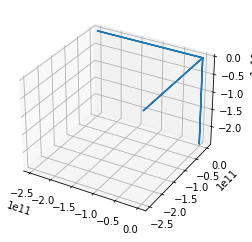

In [626]:
N = 3
#x_fit = x_fit[200:]
x1d=np.zeros(len(x_fit))
x2d=np.zeros(len(x_fit))
x0d=np.zeros(len(x_fit))
for i in range(30,len(x_fit)):
    x1d[i]=x_fit[i-30]
    x2d[i]=x_fit[i-15]
    x0d[i]=x_fit[i]

mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
ax=fig.add_subplot(111, projection= '3d')
ax.plot(x1d,x2d,x0d,label="sistema ajustado sindy")
#

## Viernes 10 de Septiembre

In [135]:
import numpy as np
from sklearn import linear_model

x = x0; y = x1; z = x2
xr=np.roll(x,1)
yr=np.roll(y,1)
zr=np.roll(z,1)

dydt=1000*(yr-y)
#dydt = np.gradient(y, 1)


time = np.arange(1,len(x)+1,1)
theta=np.zeros((len(x),8))
theta[:,0]=np.ones_like(x)
theta[:,1]=x
theta[:,2]=y
theta[:,3]=x*x
theta[:,4]=x*y
theta[:,5]=y*y
theta[:,6]=x*x*x
theta[:,7]=np.cos(2*np.pi/365. * time)


print('ajuste de y \n')
clf=linear_model.Lasso(alpha=0.001,max_iter=100000,fit_intercept=False,normalize=False)
clf.fit(-theta,dydt)
print(clf.coef_)
print(clf.intercept_)
print('\n')


ajuste de y 

[ 9.98270829e+00 -1.29252516e+01  9.27355933e+00 -3.08405134e-01
  2.77420929e-01  2.82685992e-01 -4.80526737e-03  3.13233463e+00]
0.0




/home/julia/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460016.37156999065, tolerance: 435.15876024983567
  model = cd_fast.enet_coordinate_descent(


In [517]:
def dxdt(v,t,a,omega): 
    x,z, tita= v[0], v[1], v[2]
    eps1,A, eps2,omega=0.3, a,.21,omega
    omega = 2*np.pi / 365.
    A = 2.084
    eps1=eps1 #*(1+0.0*random.normalvariate(0,0.5))

    dxdt =  z
    dzdt =  eps1 -1.01*x -6.01*z +(eps2)*x*x +.293*x*z + 0.2736*z*z - .00729*x*x*x + A*np.cos(tita) 
    dtitadt = omega
    
    return [dxdt, dzdt, dtitadt]



In [520]:
from scipy.integrate import odeint
import numpy as np
t_total=3200.0
dt=.001
t = np.arange(0,t_total,.01)
v0 = [24.1,24.0,10.0]
pi = np.pi 

a, omega = 7.5,3.5
T = 2*pi/omega
sol = odeint(dxdt,v0,t,args=(a,omega))
x_fit, z_fit, tita_fit = sol[:,0], sol[:,1], sol[:,2]

N = 3
x1d=np.zeros(len(x_fit))
x2d=np.zeros(len(x_fit))
x0d=np.zeros(len(x_fit))
for i in range(30,len(x_fit)):
    x1d[i]=-x_fit[i-30]
    x2d[i]=-x_fit[i-15]
    x0d[i]=-x_fit[i]

Tn = T/dt

/home/julia/.local/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


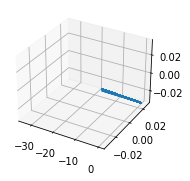

In [521]:

mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')

ax.plot(x1d,x2d,x0d,label="física")


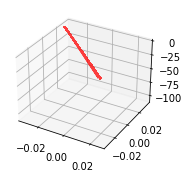

In [525]:
mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')
L = 1000
ax.plot(x0d[:L*1000],x2d[:L*1000],x1d[:L*1000],color='r',alpha=0.75,label="física")


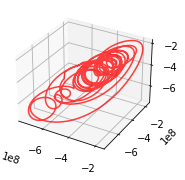

In [454]:
mpl.rcParams['legend.fontsize'] = 10
fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')
L = 4
ax.plot(x0d[121000:120000+L*1000],x2d[121000:120000+L*1000],x1d[121000:120000+L*1000],color='r',alpha=0.75,label="física")


In [486]:
def close_returns(senal):
    cr =  np.zeros((len(senal),2002)) #cr de close returns 5002 en modelo
    eps = (np.max(senal)-np.min(senal))*0.015
    print(eps)
    for j in range(2002):
        for i in range(len(senal)-2002):
            if (np.abs(senal[i+j] - senal[i]) < eps) and (np.abs(senal[i+j+2] - senal[i+2]) < eps):
                cr[i,j] = 1
    return cr

In [487]:
cr_dinamico = close_returns(x0d[121000:129000])

8985062.974052995


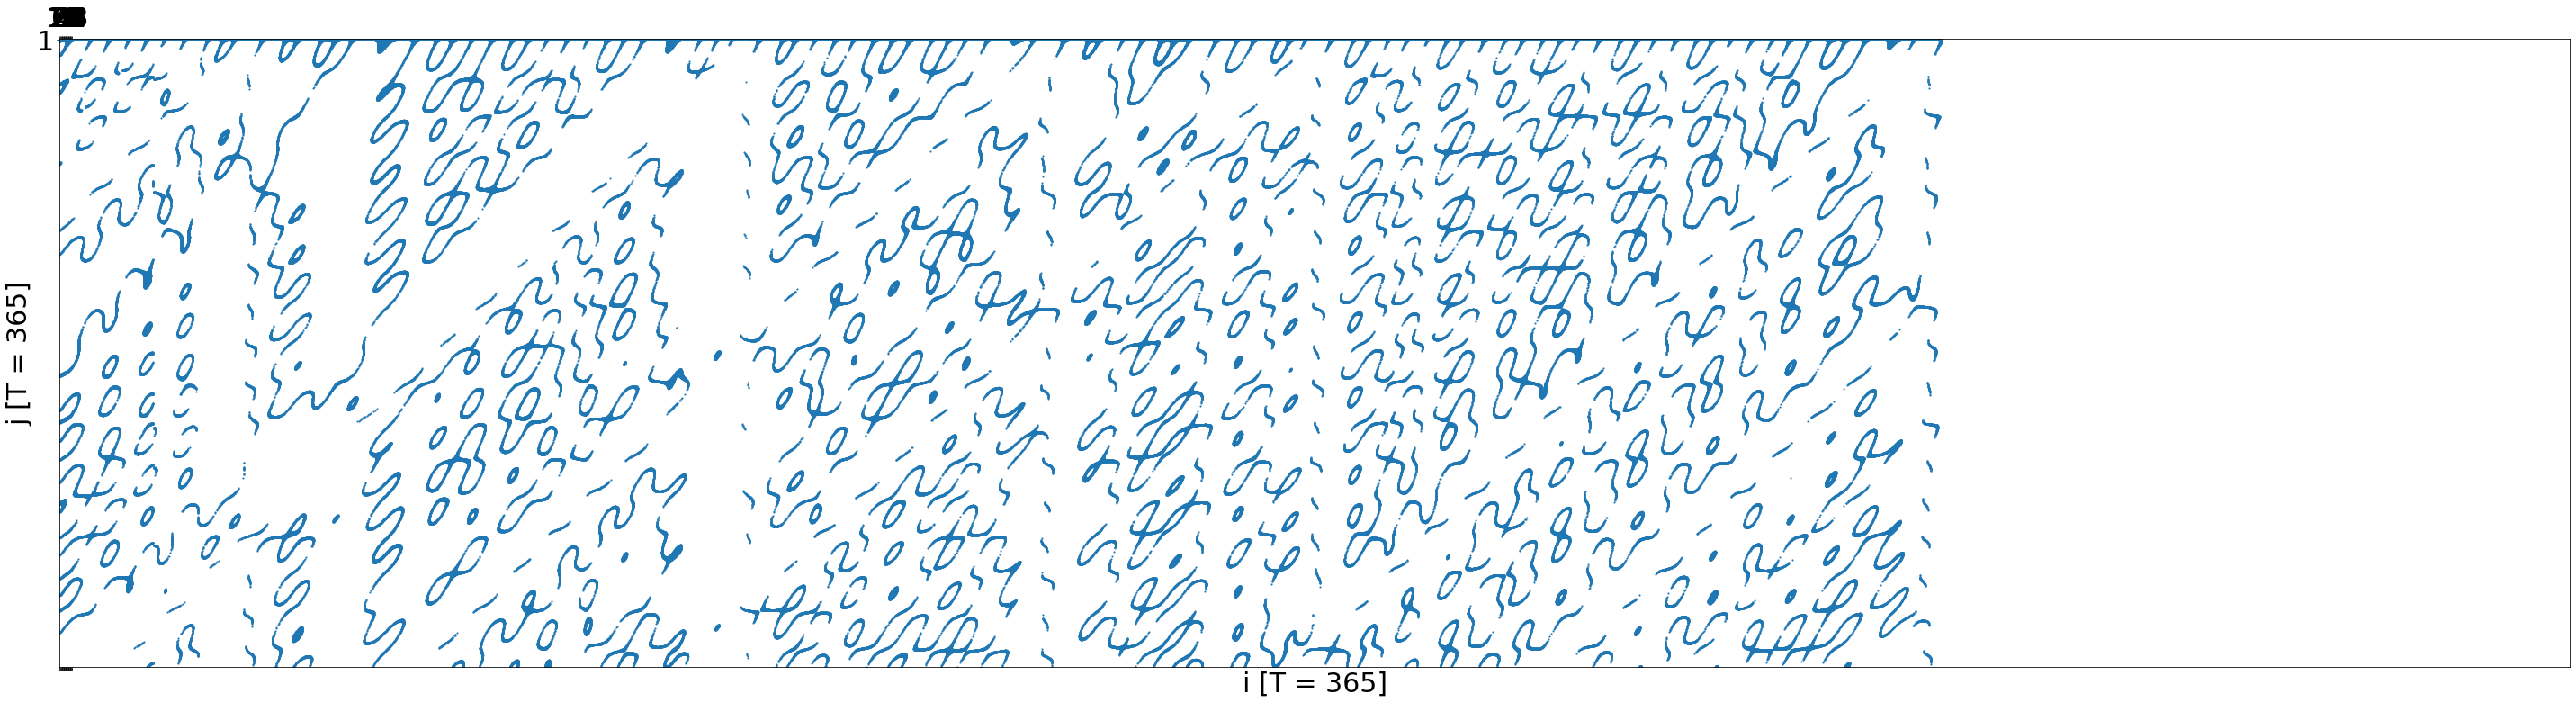

(0.0, 1460.0)

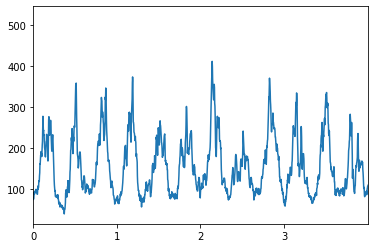

In [506]:
#cr_filtrado1 = close_returns(corregido1)
df = pd.DataFrame(data=cr_dinamico)
cr_1 = df.values[0:100000,0:500000].T
fig = plt.figure(figsize=(50,50))
plt.spy(cr_1,precision = .01, markersize = 1,aspect='equal')
plt.xticks(np.arange(0,20)*2,np.arange(0,20)*2,fontsize=30)
plt.yticks(np.arange(1,2)*3,np.arange(1,2),fontsize=30)
plt.xlabel('i [T = 365]',fontsize=30)
plt.ylabel('j [T = 365]',fontsize=30)
plt.show()

cr_1 = df.values[:50000,1:5000].T
a = np.sum(cr_1,axis=1)
plt.plot(a[60:])
plt.xticks(np.arange(0,4)*365,np.arange(0,4))
plt.xlim(0,4*365)